## Cassava only model

In [19]:
import numpy as np
import cv2 as cv
import seaborn as sns

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [2]:
train_dir = '../data/image data/train/Cassava'
test_dir = '../data/image data/test/Cassava'
val_dir = '../data/image data/validation/Cassava'

In [5]:
# data generators
train_generator = ImageDataGenerator(rescale=1. / 255)
test_generator = ImageDataGenerator(rescale=1. / 255)
val_generator = ImageDataGenerator(rescale=1. / 255)

train_data = train_generator.flow_from_directory(directory=train_dir, target_size=(56, 56))
test_data = test_generator.flow_from_directory(directory=test_dir, target_size=(56, 56))
val_data = val_generator.flow_from_directory(directory=val_dir, target_size=(56, 56))

Found 2435 images belonging to 5 classes.
Found 682 images belonging to 5 classes.
Found 341 images belonging to 5 classes.


In [15]:
base_filters = 32
cassava_model = Sequential()

cassava_model.add(InputLayer(input_shape=(56, 56, 3)))

# conv 1
cassava_model.add(Conv2D(filters=base_filters, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# # conv 2
# cassava_model.add(Conv2D(filters=base_filters, kernel_size=(3, 3), padding='same', activation=relu))
# cassava_model.add(BatchNormalization())

# pooling and dropout
cassava_model.add(MaxPooling2D(pool_size=(2, 2)))
cassava_model.add(Dropout(0.2))

# conv 3
cassava_model.add(Conv2D(filters=base_filters * 2, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# # conv 4
# cassava_model.add(Conv2D(filters=base_filters * 2, kernel_size=(3, 3), padding='same', activation=relu))
# cassava_model.add(BatchNormalization())

# pooling and dropout
cassava_model.add(MaxPooling2D(pool_size=(2, 2)))
cassava_model.add(Dropout(0.3))

# conv 5
cassava_model.add(Conv2D(filters=base_filters * 4, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# # conv 6
# cassava_model.add(Conv2D(filters=base_filters * 4, kernel_size=(3, 3), padding='same', activation=relu))
# cassava_model.add(BatchNormalization())

# pooling and dropout
cassava_model.add(MaxPooling2D(pool_size=(2, 2)))
cassava_model.add(Dropout(0.4))

# classifier
cassava_model.add(Flatten())
cassava_model.add(Dense(units=512, activation=relu))
cassava_model.add(Dropout(0.5))
cassava_model.add(Dense(units=5, activation=softmax))

cassava_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 56, 56, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 56, 56, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 56, 56, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                      

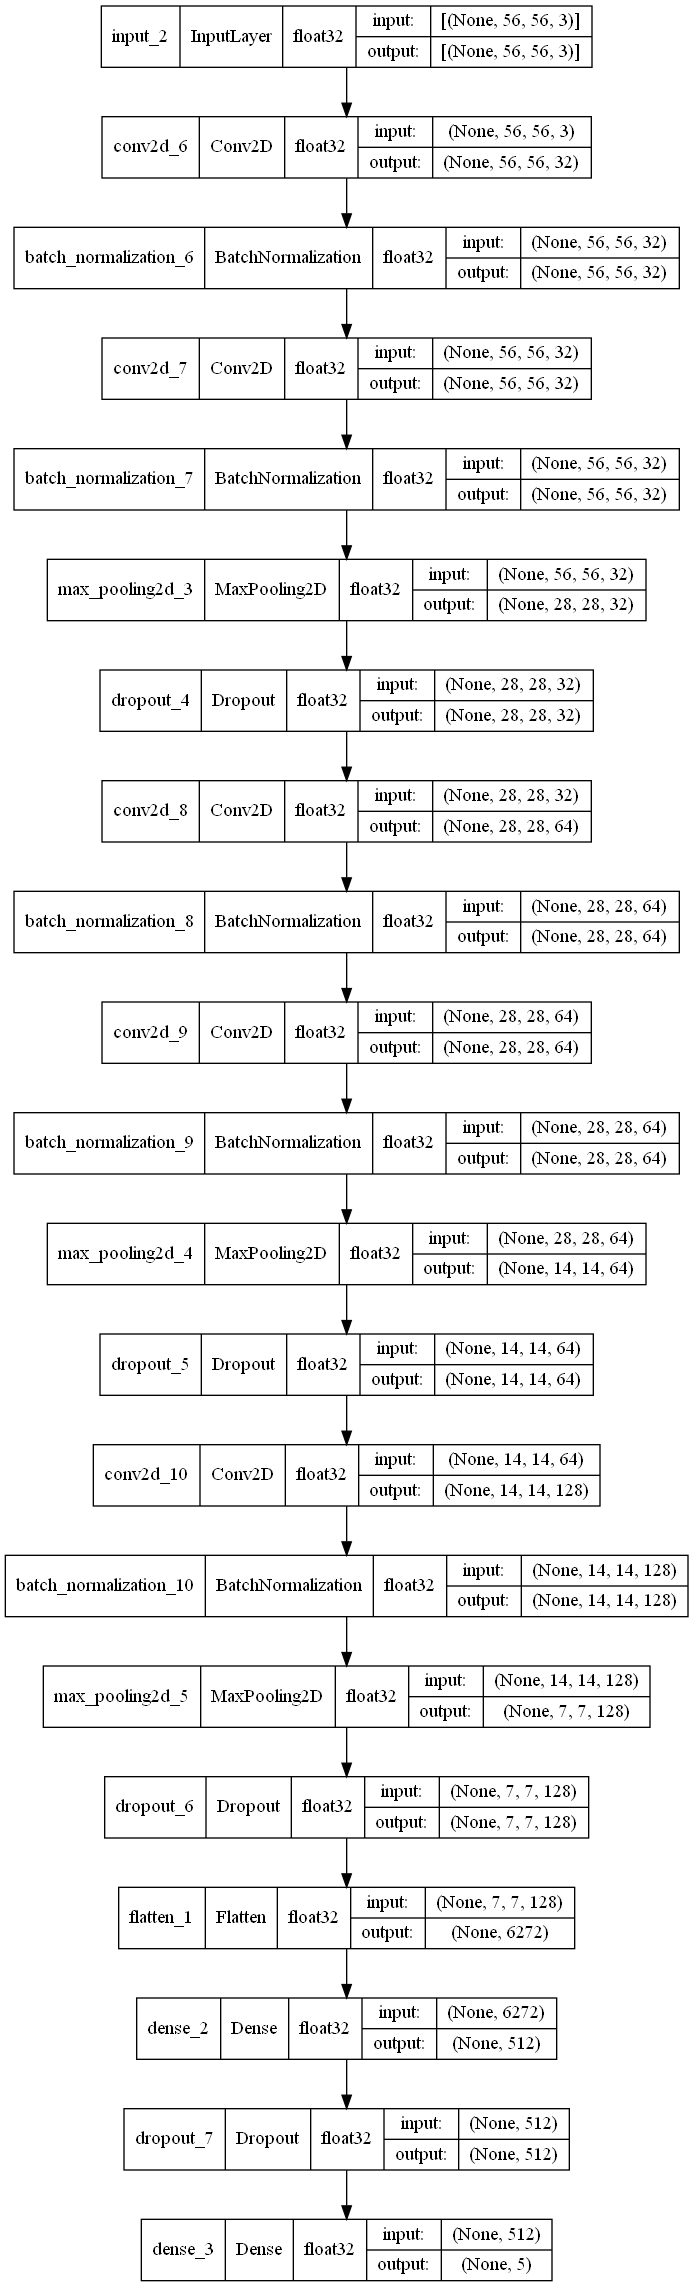

In [16]:
plot_model(model=cassava_model,
           to_file='model architecture/cassava_exp_1.png',
           show_layer_names=True,
           show_dtype=True,
           show_shapes=True)

In [11]:
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=20,
                           restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=20)

best_checkpoint = ModelCheckpoint(filepath='checkpoints/cassava_VGGNet_1.hdf5',
                                  monitor='val_loss',
                                  save_best_only=True)

In [17]:
cassava_model.compile(optimizer=Adam(),
                      loss=categorical_crossentropy,
                      metrics=[Recall(), Precision(), 'accuracy'])

In [18]:
cassava_history = cassava_model.fit(train_data,
                                    batch_size=32,
                                    epochs=500,
                                    callbacks=[early_stop, reduce_lr, best_checkpoint],
                                    validation_data=val_data)

Epoch 1/500
77/77 [==============================] - 6s 58ms/step - loss: 2.8518 - recall_1: 0.1290 - precision_1: 0.2745 - accuracy: 0.2649 - val_loss: 7.2959 - val_recall_1: 0.2962 - val_precision_1: 0.2962 - val_accuracy: 0.2962 - lr: 0.0010
Epoch 2/500
77/77 [==============================] - 4s 53ms/step - loss: 1.5433 - recall_1: 0.0275 - precision_1: 0.3764 - accuracy: 0.3051 - val_loss: 7.0907 - val_recall_1: 0.2962 - val_precision_1: 0.2962 - val_accuracy: 0.2962 - lr: 0.0010
Epoch 3/500
77/77 [==============================] - 4s 52ms/step - loss: 1.5170 - recall_1: 0.0435 - precision_1: 0.4327 - accuracy: 0.3146 - val_loss: 3.9257 - val_recall_1: 0.2346 - val_precision_1: 0.2787 - val_accuracy: 0.2874 - lr: 0.0010
Epoch 4/500
77/77 [==============================] - 4s 53ms/step - loss: 1.4617 - recall_1: 0.0509 - precision_1: 0.4509 - accuracy: 0.3441 - val_loss: 2.9011 - val_recall_1: 0.2141 - val_precision_1: 0.3080 - val_accuracy: 0.3021 - lr: 0.0010
Epoch 5/500
77/77 [=

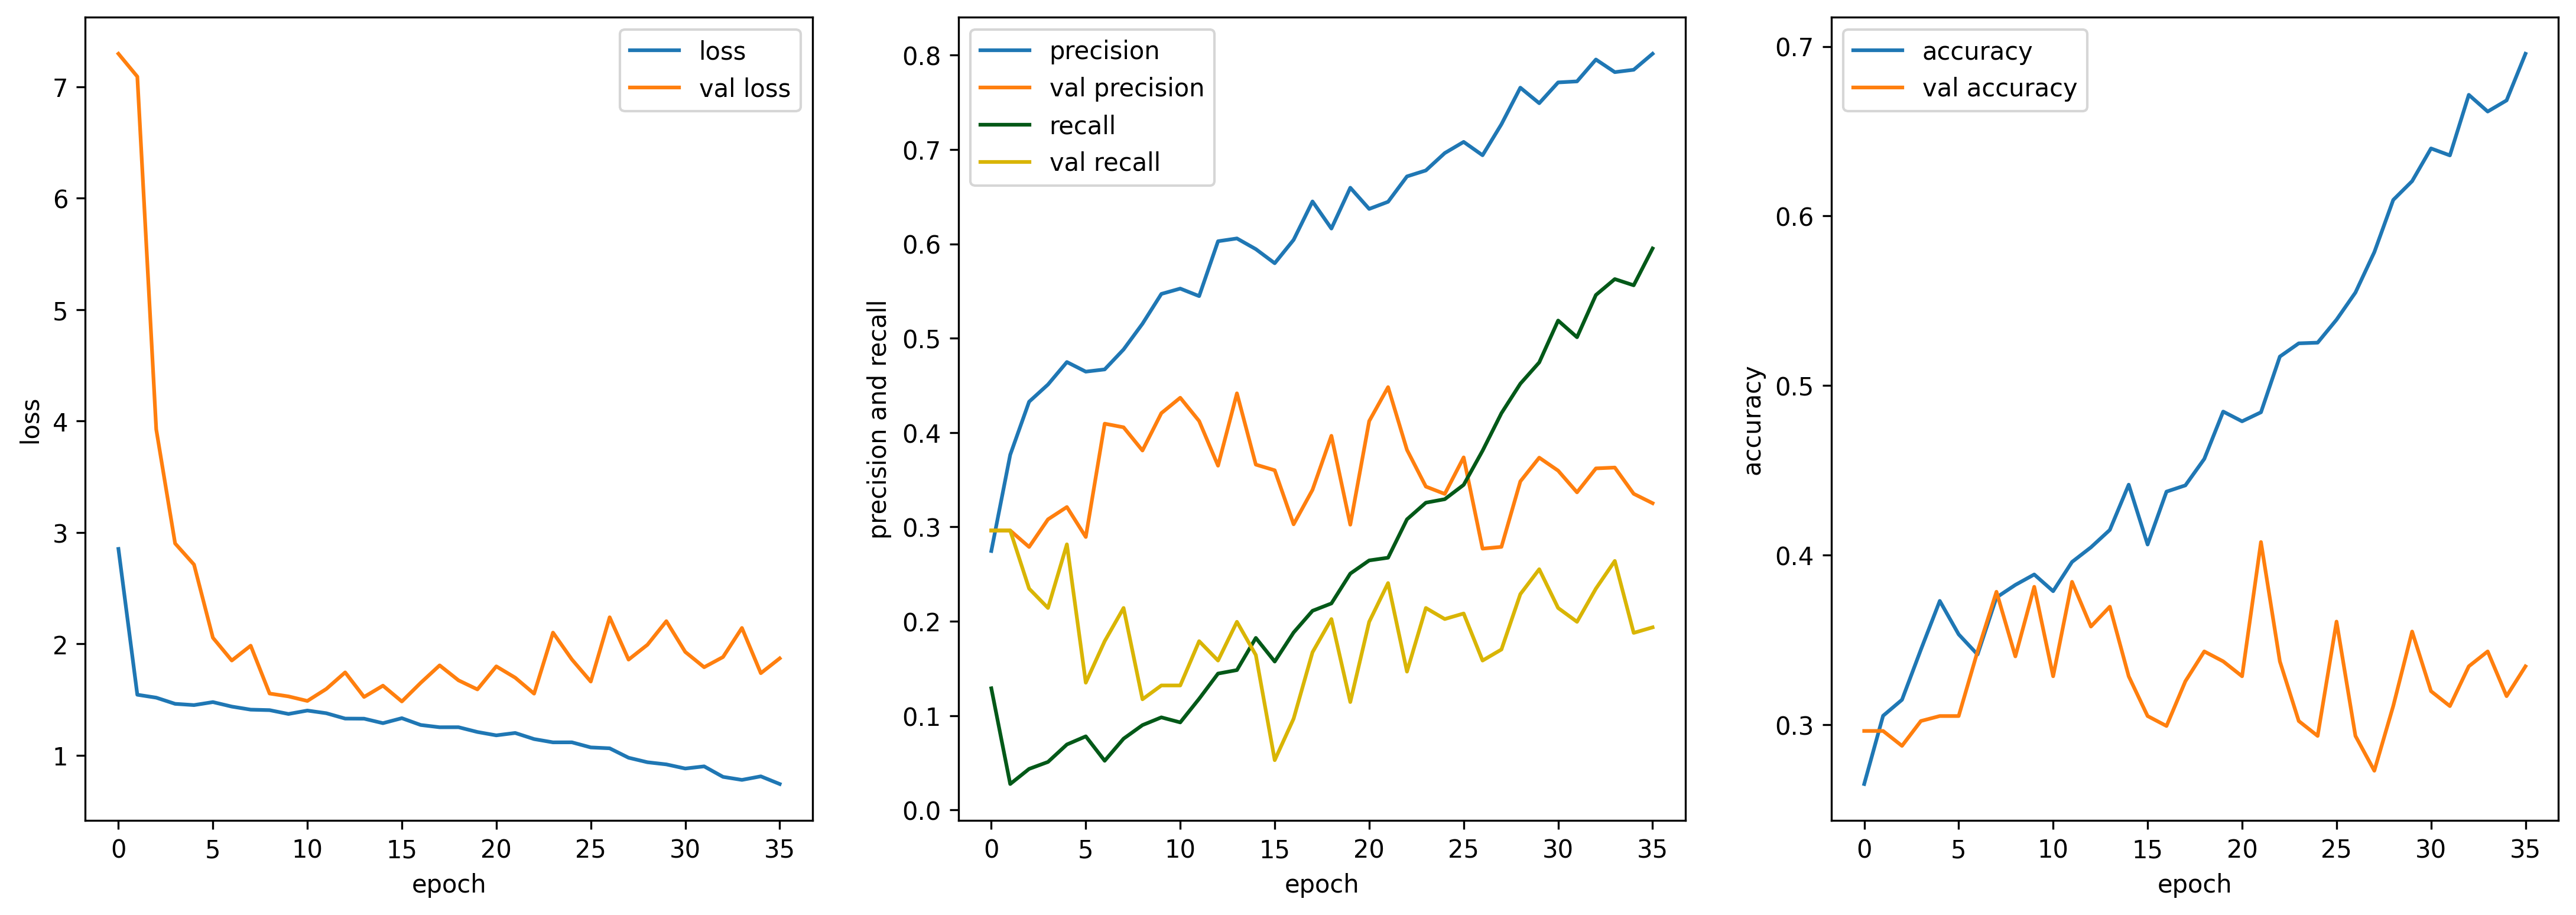

In [20]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=[18, 6], dpi=300)
axes = axes.ravel()
epochs = list(range(len(cassava_history.history['loss'])))

sns.lineplot(x=epochs, y=cassava_history.history['loss'], ax=axes[0], label='loss')
sns.lineplot(x=epochs, y=cassava_history.history['val_loss'], ax=axes[0], label='val loss')
sns.lineplot(x=epochs, y=cassava_history.history['precision_1'], ax=axes[1], label='precision')
sns.lineplot(x=epochs, y=cassava_history.history['val_precision_1'], ax=axes[1], label='val precision')
sns.lineplot(x=epochs, y=cassava_history.history['recall_1'], color='#025918', ax=axes[1], label='recall')
sns.lineplot(x=epochs, y=cassava_history.history['val_recall_1'], color='#D9B504', ax=axes[1], label='val recall')
sns.lineplot(x=epochs, y=cassava_history.history['accuracy'], ax=axes[2], label='accuracy')
sns.lineplot(x=epochs, y=cassava_history.history['val_accuracy'], ax=axes[2], label='val accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('precision and recall')
axes[2].set_xlabel('epoch')
axes[2].set_ylabel('accuracy')
plt.savefig('VGGNet_base_conv_train_history.png')
plt.show()